In [0]:
import pandas as pd

# Dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Download the dataset directly into a Pandas DataFrame
df = pd.read_csv(url, delimiter=";")

# Display dataset information
print(f"Dataset shape: {df.shape}")
print("First few rows of the dataset:")
print(df.head())


Dataset shape: (1599, 12)
First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      

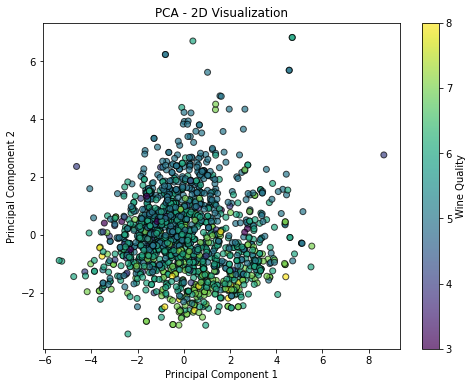

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract features and standardize them
features = df.iloc[:, :-1]  # All columns except the last one (quality)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Wine Quality")
plt.title("PCA - 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed in 10.98 seconds


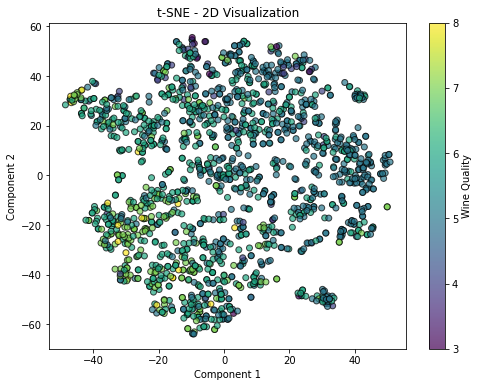

In [0]:
from sklearn.manifold import TSNE
import time

# Apply t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)
print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Wine Quality")
plt.title("t-SNE - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [0]:
%pip install umap-learn

Python interpreter will be restarted.
Python interpreter will be restarted.


/local_disk0/.ephemeral_nfs/envs/pythonEnv-49b593dc-d4f3-475e-8a84-ec9b59653515/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


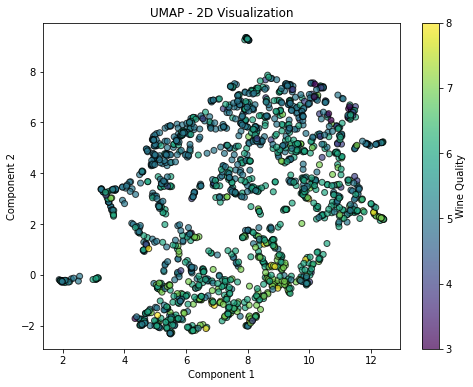

In [0]:
import umap.umap_ as umap

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features_scaled)

# Visualize the UMAP results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Wine Quality")
plt.title("UMAP - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


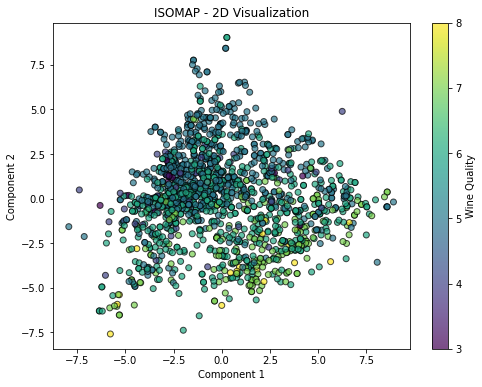

In [0]:
from sklearn.manifold import Isomap

# Apply ISOMAP
isomap = Isomap(n_neighbors=10, n_components=2)
isomap_result = isomap.fit_transform(features_scaled)

# Visualize the ISOMAP results
plt.figure(figsize=(8, 6))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Wine Quality")
plt.title("ISOMAP - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


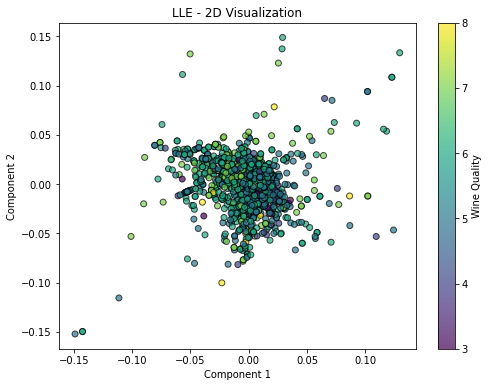

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42)
lle_result = lle.fit_transform(features_scaled)

# Visualize the LLE results
plt.figure(figsize=(8, 6))
plt.scatter(lle_result[:, 0], lle_result[:, 1], c=df['quality'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Wine Quality")
plt.title("LLE - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
